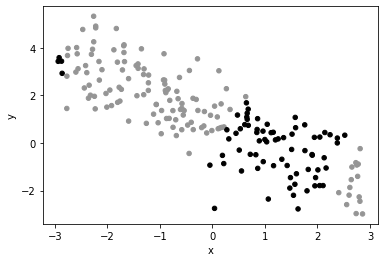

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, 200)
y = 1 - x + np.random.normal(0, size=x.shape)
z = ((0 < x-y/3) & (x-y/3 < 2.8)) | (x < -2.8)

df = pd.DataFrame({"x":x, "y":y, "z":z})
ax = df.plot.scatter(x="x", y="y", c=df["z"], vmin=-1)

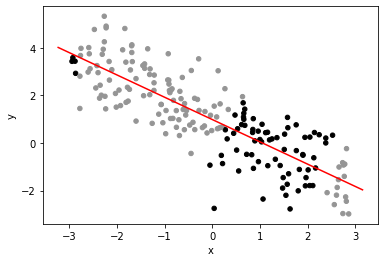

In [15]:
from sklearn.linear_model import LinearRegression
ax = df.plot.scatter(x="x", y="y", c=df["z"], vmin=-1)

lr = LinearRegression()
lr.fit(df[["x"]], df["y"])
x = np.array(ax.get_xlim())
y = lr.predict(x.reshape(-1, 1))
ax.plot(x, y, c="red")

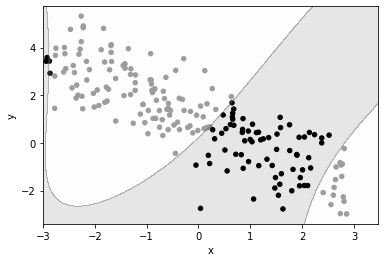

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("poly", PolynomialFeatures(3)), # degree 1 does nothing
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])
pipe.fit(df[["x", "y"]], df["z"])

df.plot.scatter(x="x", y="y", c=df["z"], vmin=-1)

x, y = np.meshgrid(np.arange(-3, ax.get_xlim()[1], 0.01),
                   np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 0.01))

xy = np.hstack((x.reshape(-1,1), y.reshape(-1,1)))

z = pipe.predict(xy).reshape(x.shape)

plt.contourf(x, y, z, alpha=0.1, cmap="binary")